## Observations and Insights 
---

*

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Check the tables to decide on merge types
#mouse_metadata

In [4]:
#study_results

In [5]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#alt_df = merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')
#alt_df

In [7]:
#print(len(alt_df['Mouse ID'].value_counts()))

In [8]:
#duplicate_mice = merge_df.duplicated(subset=['Mouse ID', 'Timepoint',])

In [9]:
# Checking the number of mice.
# .nunique doesn't count NaN entries unlike .unique
num_mice = merge_df["Mouse ID"].nunique()
num_mice

total_mice = merge_df["Mouse ID"].count()
total_mice

mice_df = pd.DataFrame({"Total Mice": [total_mice], "Unique Mice": [num_mice]})
mice_df

,Total Mice,Unique Mice
0,1893,249


In [10]:
#duplicate_mice = merge_df.duplicated(subset=['Mouse ID', 'Timepoint',])
#duplicate_mice.value_counts()


In [11]:
#dupe = merge_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])
#dupe

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#---https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas
duplicate_mice = merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Shows Mouse G989 has duplicate data
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drops one set of mouse G989's data
clean_df = merge_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep=False).reset_index(drop=True)

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_df["Mouse ID"].nunique()
num_mice_clean

# Total is 5 less than merge_df's total becuase of the dropped duplicate data of mouse G989
total_mice_clean = clean_df["Mouse ID"].count()
total_mice_clean

clean_mice_df = pd.DataFrame({"Total Mice": [total_mice_clean], "Unique Mice": [num_mice_clean]})
clean_mice_df

,Total Mice,Unique Mice
0,1883,249


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = clean_df.groupby("Drug Regimen")
#for key, item in drug_group:
#    print(drug_group.get_group(key))

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = drug_group["Tumor Volume (mm3)"].mean().rename("Mean Tumor Volume")
#print(tumor_volume_mean)

tumor_volume_median = drug_group["Tumor Volume (mm3)"].median().rename("Median Tumor Volume")
#print(tumor_volume_median)

tumor_volume_var = drug_group["Tumor Volume (mm3)"].var().rename("Tumor Volume Variance")
#print(tumor_volume_var)

tumor_volume_std = drug_group["Tumor Volume (mm3)"].std().rename("Tumor Standard Deviation")
#print(tumor_volume_std)

tumor_volume_sem = drug_group["Tumor Volume (mm3)"].sem().rename("Tumor Volume SEM")
#print(tumor_volume_sem)

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)": tumor_volume_mean, "Median Tumor Volume (mm3)": tumor_volume_median,
    "Tumor Volume Variance (mm3)": tumor_volume_var, "Tumor Volume Standar Deviation": tumor_volume_std,
    "Tumor Volume SEM": tumor_volume_sem
})

summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Standar Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#---https://jamesrledoux.com/code/group-by-aggregate-pandas

summary_group = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summary_group


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = clean_df["Drug Regimen"].value_counts()
#type(counts)
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     151
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


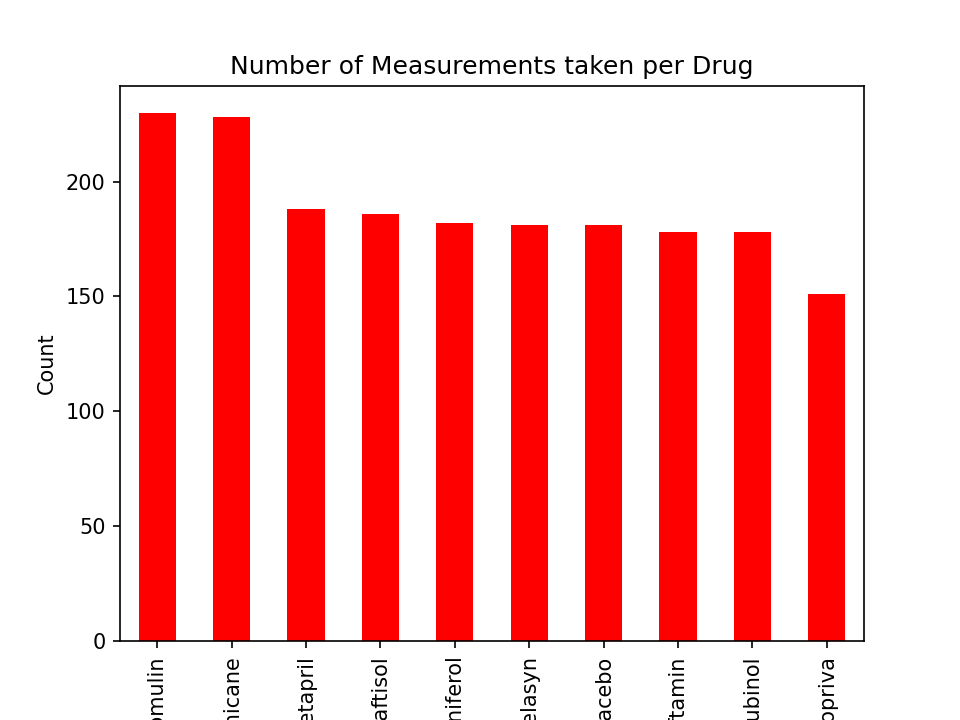

Text(0.5, 1.0, 'Number of Measurements taken per Drug')

In [30]:
counts.plot(kind='bar', color='red')
plt.xlabel("Drug Name")
plt.ylabel("Count")
plt.title("Number of Measurements taken per Drug")
plt.show()

In [32]:
#counts.index.values

In [33]:
#counts.values

<IPython.core.display.Javascript object>


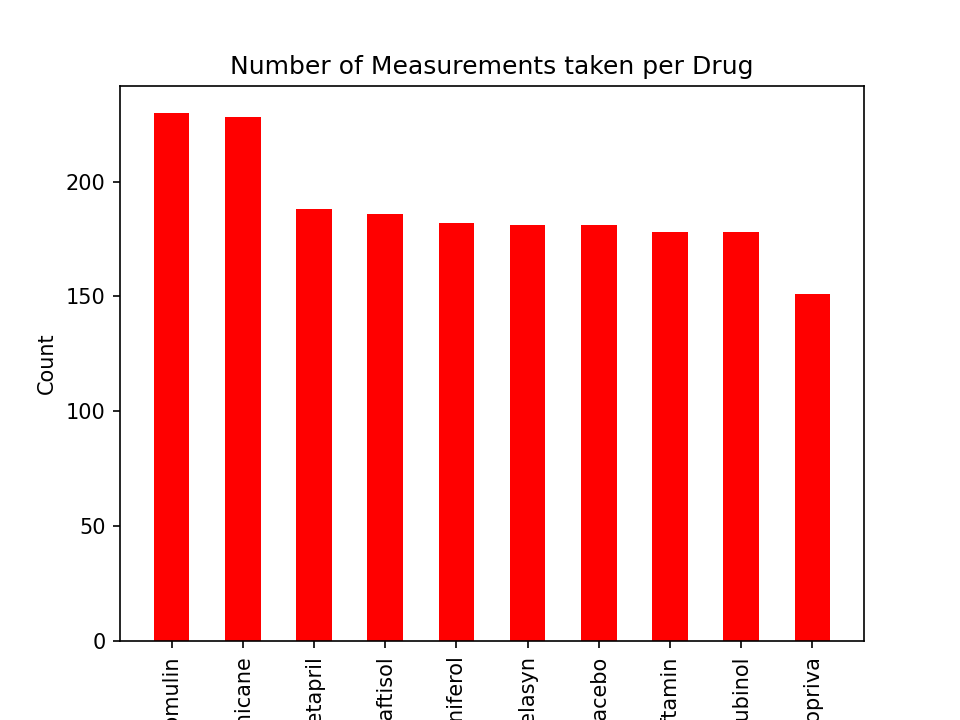

In [46]:
plt.bar(counts.index.values, counts.values, color='red', width=0.5, align="center")
plt.xticks(rotation='vertical')
plt.xlabel("Drug Name")
plt.ylabel("Count")
plt.title("Number of Measurements taken per Drug")
plt.show()

In [22]:
length = len(clean_df.groupby("Drug Regimen").count())
length

10

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = clean_df["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%")

<AxesSubplot:ylabel='Sex'>

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts.values, labels=gender_counts.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
clean_df.groupby(["Mouse ID"])["Timepoint"].max()


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [28]:
last_timepoint = last_timepoint.reset_index

NameError: name 'last_timepoint' is not defined

In [ ]:
print(last_timepoint)

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(clean_df, last_timepoint, on=["Mouse ID", "Timepoint"], how="right")
final_tumor_vol

In [ ]:
finvol

In [ ]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
finvol = []
for drug in drugs:
    finalvolume = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    finvol.append(finalvolume)
    .quartile

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
